In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

start_time = pd.datetime.now()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if sys.path[0] == '':


In [3]:
data = pd.read_csv('/content/drive/My Drive/5. USC/3. Spring 2020/DSO562 Fraud/Project/project01/NY property data.csv')

In [4]:
data

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,LTDEPTH,EXT,STORIES,FULLVAL,AVLAND,AVTOT,EXLAND,EXTOT,EXCD1,STADDR,ZIP,EXMPTCL,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,1046,NaN,NaN,21400000.0,4225500.0,9630000.0,4225500.0,9630000.0,4600.0,1 LIBERTY ISLAND,10004.0,X3,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,0,NaN,NaN,193800000.0,14310000.0,87210000.0,14310000.0,87210000.0,4600.0,1 ELLIS ISLAND,10004.0,X3,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,564,E,3.0,104686000.0,39008700.0,47108700.0,39008700.0,47108700.0,2191.0,MARGINAL STREET,10004.0,X1,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,551,NaN,2.0,39200000.0,15255000.0,17640000.0,15255000.0,17640000.0,2191.0,PIER 6,10004.0,X1,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,1260,NaN,1.0,272300000.0,121050000.0,122535000.0,121050000.0,122535000.0,2231.0,BATTERY PARK,10004.0,X1,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070989,1070990,5080500083,5,8050,83,NaN,"TOBIN, GALE",A1,1,60,120,NaN,2.5,438000.0,14536.0,23322.0,1620.0,1620.0,1017.0,142 BENTLEY STREET,10307.0,NaN,30,26,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1070990,1070991,5080500086,5,8050,86,NaN,SHERRI MILINAZZO,A1,1,62,228,NaN,2.5,544000.0,9303.0,14929.0,1620.0,1620.0,1017.0,146 BENTLEY STREET,10307.0,NaN,32,26,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR
1070991,1070992,5080500089,5,8050,89,NaN,JOHN GERVASI,A1,1,53,273,G,2.0,480000.0,14790.0,22975.0,14728.0,14728.0,1015.0,150 BENTLEY STREET,10307.0,NaN,24,32,NaN,NaN,NaN,NaN,1017.0,FINAL,2010/11,AC-TR
1070992,1070993,5080500092,5,8050,92,NaN,RITA M MOOG,A1,1,52,136,NaN,2.0,543000.0,12388.0,23037.0,1620.0,1620.0,1017.0,156 BENTLEY STREET,10307.0,NaN,32,21,NaN,NaN,NaN,NaN,NaN,FINAL,2010/11,AC-TR


## Data Exploration

For this project, I only use the following fields:
- Property Size: LTFRONT, LTDEPTH, BLDFRONT, BLDDEPTH, STORIES
- Property Value: FULLVAL, AVLAND, AVTOT
- Location and Characteristics: B, BLOCK, LOT, ZIP, TAXCLASS


In [5]:
data.dtypes

RECORD        int64
BBLE         object
B             int64
BLOCK         int64
LOT           int64
EASEMENT     object
OWNER        object
BLDGCL       object
TAXCLASS     object
LTFRONT       int64
LTDEPTH       int64
EXT          object
STORIES     float64
FULLVAL     float64
AVLAND      float64
AVTOT       float64
EXLAND      float64
EXTOT       float64
EXCD1       float64
STADDR       object
ZIP         float64
EXMPTCL      object
BLDFRONT      int64
BLDDEPTH      int64
AVLAND2     float64
AVTOT2      float64
EXLAND2     float64
EXTOT2      float64
EXCD2       float64
PERIOD       object
YEAR         object
VALTYPE      object
dtype: object

In [6]:
numerical = ['LTFRONT','LTDEPTH','BLDFRONT','BLDDEPTH',"FULLVAL","AVLAND","AVTOT",'STORIES']
categorical = ['B','BLOCK','LOT','STADDR','ZIP','TAXCLASS']
data = data[['RECORD']+categorical+numerical].copy()

Here, I check the number of null values, unique values, 0's and distribution of the fields

In [7]:
data[['B','BLOCK','LOT','ZIP']] = data[['B','BLOCK','LOT','ZIP']].astype(str).replace('nan',np.nan)

In [8]:
(data[numerical]==0).sum()

LTFRONT     169108
LTDEPTH     170128
BLDFRONT    228815
BLDDEPTH    228853
FULLVAL      13007
AVLAND       13009
AVTOT        13007
STORIES          0
dtype: int64

In [9]:
data[numerical] = data[numerical].replace({0:np.nan})

In [10]:
data.isna().sum()

RECORD           0
B                0
BLOCK            0
LOT              0
STADDR         676
ZIP          29890
TAXCLASS         0
LTFRONT     169108
LTDEPTH     170128
BLDFRONT    228815
BLDDEPTH    228853
FULLVAL      13007
AVLAND       13009
AVTOT        13007
STORIES      56264
dtype: int64

In [11]:
data.nunique()

RECORD      1070994
B                 5
BLOCK         13984
LOT            6366
STADDR       839280
ZIP             196
TAXCLASS         11
LTFRONT        1296
LTDEPTH        1369
BLDFRONT        611
BLDDEPTH        620
FULLVAL      109323
AVLAND        70920
AVTOT        112913
STORIES         111
dtype: int64

In [12]:
sns.set()

In [13]:
def plot_bar(colname, length=6.4, width=4.8, rotation='None', log_scale=None):
    plt.figure(figsize=(length, width))
    y = data[colname].value_counts().head(15)
    x = y.index
    plt.bar(x, y)
    plt.ylabel('Frequency')
    plt.xlabel(colname)
    if rotation==1:
        plt.xticks(rotation=90)
    if log_scale==1:
        plt.yscale('log')
        plt.ylabel('log scale of Frequency')
    else:
        plt.ylabel('Frequency')    
    plt.title(colname+' (top {})'.format(min(data[colname].nunique(), 15)))
    plt.show()

In [14]:
def plot_hist(data, colname, bins=50, xhigh=None, length=6.4, width=4.8, log_scale=None):
    if xhigh==None:
        xhigh = data[colname].max()
    plt.figure(figsize=(length, width))
    plt.hist(data[data[colname]<xhigh][colname].dropna(), bins=bins, edgecolor='blue')
    plt.xlabel(colname)
    plt.xlim(0, xhigh)
    plt.title(' Distribution of '+colname)
    if log_scale==1:
        plt.yscale('log')
        plt.ylabel('log scale of Frequency')
    else:
        plt.ylabel('frequency')
    plt.show()

### B
Borough or districts in NYC (1: Manhattan, 2: Bronx, 3: Brooklyn, 4: Queens, 5: Staten Island)

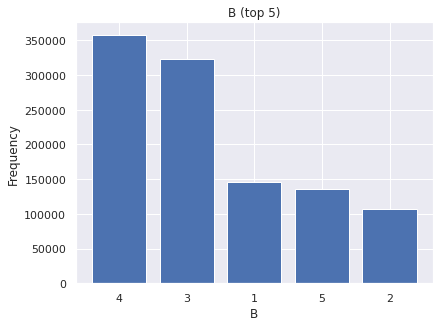

In [15]:
plot_bar('B')

### BLOCK
Valid block ranges within boroughs

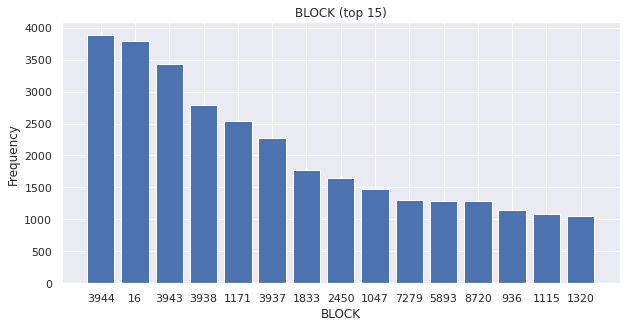

In [16]:
plot_bar('BLOCK', 10)

### LOT
Unique number within each borough or block

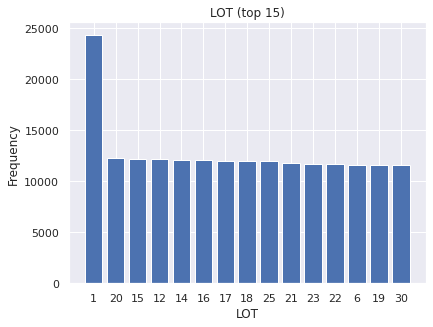

In [17]:
plot_bar('LOT')

### STADDR
Street address of the property

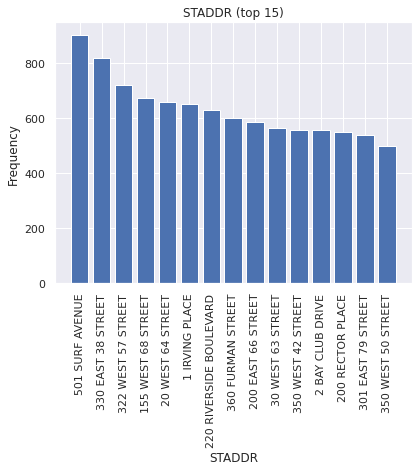

In [18]:
plot_bar('STADDR', rotation=1)

### ZIP
Postal zip code of the property

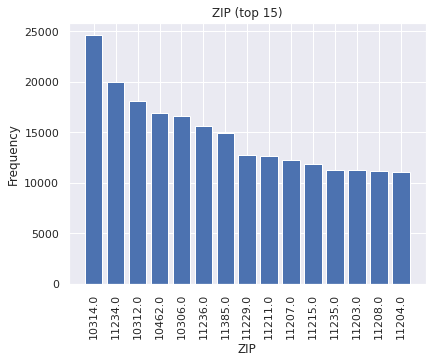

In [19]:
plot_bar('ZIP', rotation=1)

### TAXCLASS
The current property tax class code (NYS Classification)
- The first position of the tax class has a direct correlation with the building class.
- 1: 1-3 unit residences, 1a: 1-3 story condominiums, 1b: residential vacant land, 1c: 1-3 unit condominums, 
1d: select bungalow colonies, 2: apartments, 2a: apartments with 4-6 units, 2b: apartments with 7-10 units, 
2c: coops/condos with 2-10 units, 3: utilities except ceiling rr, 4a: utilities - ceiling railroads, 4: all others

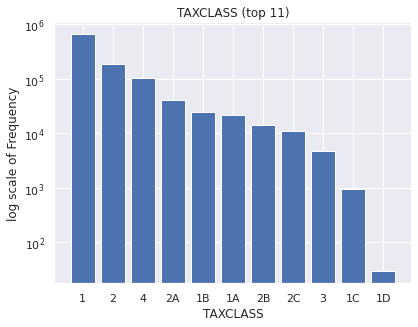

In [20]:
plot_bar('TAXCLASS', log_scale=1)

### LTFRONT
Lot width in feet

In [21]:
data['LTFRONT'].describe()

count    901886.000000
mean         43.504598
std          78.801676
min           1.000000
25%          20.000000
50%          25.000000
75%          40.000000
max        9999.000000
Name: LTFRONT, dtype: float64

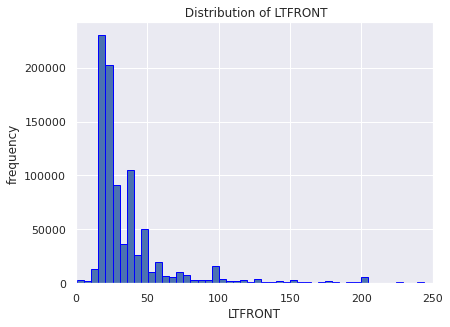

In [22]:
plot_hist(data, 'LTFRONT', bins=50, xhigh=250)

### LTDEPTH
Lot depth in feet

In [23]:
data['LTDEPTH'].describe()

count    900866.000000
mean        105.643052
std          71.873122
min           1.000000
25%          97.000000
50%         100.000000
75%         100.000000
max        9999.000000
Name: LTDEPTH, dtype: float64

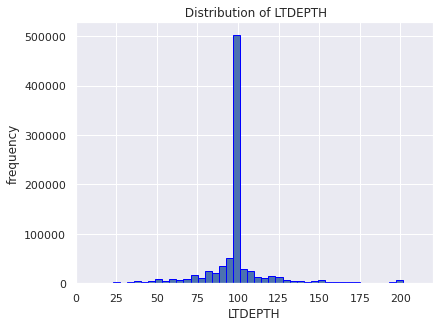

In [24]:
plot_hist(data, 'LTDEPTH', xhigh=220)

### BLDFRONT
Building width in feet

In [25]:
data['BLDFRONT'].describe()

count    842179.000000
mean         29.303352
std          37.767716
min           1.000000
25%          18.000000
50%          20.000000
75%          25.000000
max        7575.000000
Name: BLDFRONT, dtype: float64

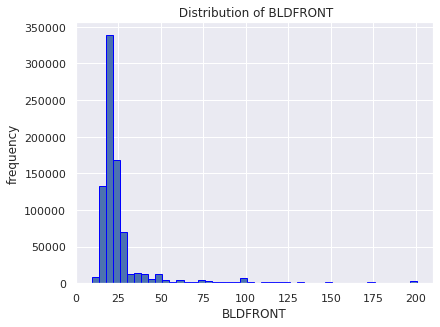

In [26]:
plot_hist(data, 'BLDFRONT', xhigh=210)

### BLDDEPT
Building depth in feet

In [27]:
data['BLDDEPTH'].describe()

count    842141.000000
mean         50.771923
std          42.056149
min           1.000000
25%          35.000000
50%          44.000000
75%          55.000000
max        9393.000000
Name: BLDDEPTH, dtype: float64

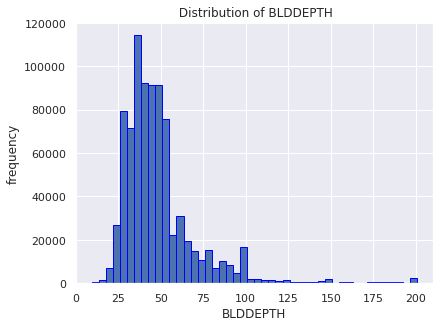

In [28]:
plot_hist(data, 'BLDDEPTH', xhigh=210)

### FULLVAL
Market value of the property

In [29]:
data['FULLVAL'].describe()

count    1.057987e+06
mean     8.850128e+05
std      1.165300e+07
min      4.000000e+00
25%      3.110000e+05
50%      4.500000e+05
75%      6.230000e+05
max      6.150000e+09
Name: FULLVAL, dtype: float64

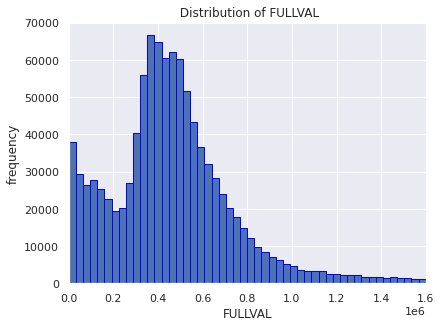

In [30]:
plot_hist(data, 'FULLVAL', xhigh=1600000)

### AVLAND
Actual land value of the property

In [31]:
data['AVLAND'].describe()

count    1.057985e+06
mean     8.611392e+04
std      4.082117e+06
min      1.000000e+00
25%      9.445000e+03
50%      1.378200e+04
75%      1.986000e+04
max      2.668500e+09
Name: AVLAND, dtype: float64

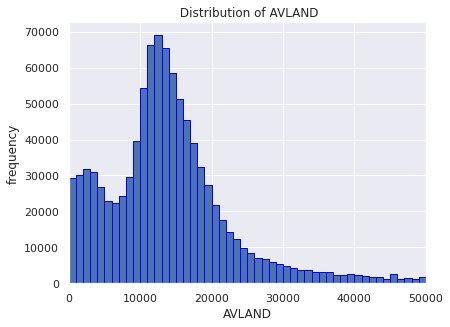

In [32]:
plot_hist(data, 'AVLAND', xhigh=50000)

### AVTOT
Actual total value of the property

In [33]:
data['AVTOT'].describe()

count    1.057987e+06
mean     2.300319e+05
std      6.919630e+06
min      1.000000e+00
25%      1.865700e+04
50%      2.556000e+04
75%      4.625000e+04
max      4.668309e+09
Name: AVTOT, dtype: float64

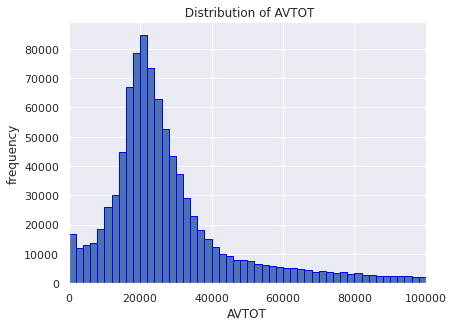

In [34]:
plot_hist(data, 'AVTOT', xhigh=100000)

### STORIES
Number of stories for the building (# of floors)

In [35]:
data['STORIES'].describe()

count    1.014730e+06
mean     5.006918e+00
std      8.365707e+00
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      1.190000e+02
Name: STORIES, dtype: float64

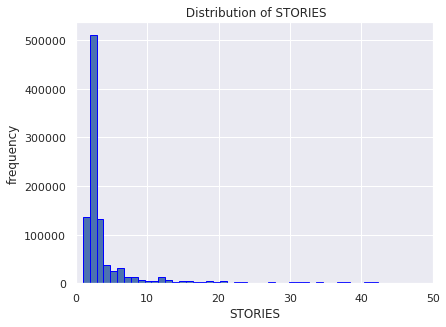

In [36]:
plot_hist(data, 'STORIES', xhigh=50)

## Data Cleaning

I impute the missing values in FULLVAL, AVLAND, AVTOT, LTFRONT, LTDEPTH, BLDFRONT, BLDDEPTH, STORIES, and ZIP fields.

In [37]:
data.isna().sum()

RECORD           0
B                0
BLOCK            0
LOT              0
STADDR         676
ZIP          29890
TAXCLASS         0
LTFRONT     169108
LTDEPTH     170128
BLDFRONT    228815
BLDDEPTH    228853
FULLVAL      13007
AVLAND       13009
AVTOT        13007
STORIES      56264
dtype: int64

### ZIP

I use the address in STADDR field to fill in the ZIP code. If there are several values in one group, I use the mode of that group. Then, I iterate the process using B+BLOCK+LOT, B+BLOCK, and B.

In [38]:
def most_frequent(df, col):
    idx = df.reset_index()['count'].idxmax()
    return df[col].iloc[idx]

In [39]:
def replace_null(df, colname, linkingnames):   
    for linkingname in linkingnames:
        initialnull = df[colname].isna().sum()
        temp = df.groupby([linkingname, colname]).size().reset_index().rename(columns={0:'count'})
        temp = temp.groupby(linkingname).apply(most_frequent, col=colname)
        df['mode_'+colname+'_groupby_'+linkingname] = df[linkingname].map(temp)
        df[colname] = np.where(df[colname].isna()==True, df['mode_'+colname+'_groupby_'+linkingname], df[colname])
        endnull = df[colname].isna().sum()
        print(f'using {linkingname} - initial: {initialnull} null values, replaced: {initialnull-endnull} null values, remaining: {endnull} null values')
        df.drop(columns='mode_'+colname+'_groupby_'+linkingname, inplace=True)
    return df

In [40]:
data['BBL'] = data['B'] + data['BLOCK'] + data['LOT']
data['BB'] = data['B'] + data['BLOCK']

In [41]:
data = replace_null(data, 'ZIP', ['STADDR','BBL','BB','B'])

using STADDR - initial: 29890 null values, replaced: 17527 null values, remaining: 12363 null values
using BBL - initial: 12363 null values, replaced: 1934 null values, remaining: 10429 null values
using BB - initial: 10429 null values, replaced: 10012 null values, remaining: 417 null values
using B - initial: 417 null values, replaced: 417 null values, remaining: 0 null values


### Property values and sizes

I fill the missing values in the property value and size fields with the median value of the linking fields for each record. I use the median instead of the mean, as the distributions of the numerical fields are mostly right-skewed. For the linking fields, I use (ZIP, TAXCLASS), (B, TAXCLASS), TAXCLASS and then B.
- The neighborhood could be a good predictor since lot area for properties would be comparable neighborhood-to-neighborhood. 
- Similarly, TAXCLASS group similar buildings by incorporating building class, no. of units, no. of apartments, utilities, and etc.

In [42]:
numerical

['LTFRONT',
 'LTDEPTH',
 'BLDFRONT',
 'BLDDEPTH',
 'FULLVAL',
 'AVLAND',
 'AVTOT',
 'STORIES']

In [43]:
linkings = [['ZIP','TAXCLASS'],['B','TAXCLASS'],'TAXCLASS','B']
for link in linkings:
    for col in numerical[:-1]:
        data['group_count'] = data.groupby(link)[col].transform('count')
        group_gt_5 = data.group_count > 5
        data.loc[group_gt_5, col] = data.loc[group_gt_5, col].fillna(data.groupby(link)[col].transform('median'))
    if data[numerical].isna().sum().sum() == 0:
        break
data.drop(columns='group_count', inplace=True)

### STORIES

I fill the missing values in the STORIES with the median value of the linking fields for each record. For the linking fields, I use the building area (BLDFRONT*BLDDEPTH), ZIP, and then TAXCLASS. For the building area, I divide it into 10 different bins of equal size and use the median value of that bin.

In [44]:
data['bldarea_bins'] = pd.qcut(data['BLDFRONT'] * data['BLDDEPTH'], 10, labels=False)
linkings = ['bldarea_bins','ZIP','TAXCLASS']
for link in linkings:
    col = 'STORIES'
    data['group_count'] = data.groupby(link)[col].transform('count')
    group_gt_5 = data.group_count > 5
    data.loc[group_gt_5, col] = data.loc[group_gt_5, col].fillna(data.groupby(link)[col].transform('median'))
    if data[numerical].isna().sum().sum() == 0:
        break
data.drop(columns='group_count', inplace=True)
data.drop(columns='bldarea_bins', inplace=True)

In [45]:
data.isna().sum()

RECORD        0
B             0
BLOCK         0
LOT           0
STADDR      676
ZIP           0
TAXCLASS      0
LTFRONT       0
LTDEPTH       0
BLDFRONT      0
BLDDEPTH      0
FULLVAL       0
AVLAND        0
AVTOT         0
STORIES       0
BBL           0
BB            0
dtype: int64

## Feature Engineering

Here, I create 45 expert variables which might be able to capture anomalies in the property values. I normalize the property value variables using the size and calculate the ratio comparing them to the average value of different entities.

I first create the following 3 variables for lot area, building area, building volume:
$$ lotarea = LTFRONT * LTDEPTH \\
bldarea = BLDFRONT * BLDDEPTH \\
bldvol = bldarea * STORIES $$

In [46]:
data['lotarea'] = data['LTFRONT'] * data['LTDEPTH']
data['bldarea'] = data['BLDFRONT'] * data['BLDDEPTH']
data['bldvol'] = data['bldarea'] * data['STORIES']

Next, I normalize the FULLVAL, AVLAND, and AVTOT by the areas and volume.

In [47]:
for i in ['FULLVAL','AVLAND','AVTOT']:
    for j in ['lotarea','bldarea','bldvol']:
        data[i.lower()+'_'+j] = data[i] / data[j]

I group the 9 normalized values by 4 different entities (zip3, zip5, taxclass, borough) and calculate the average.

In [48]:
vars = data.columns[::-1][:9][::-1].tolist()
data['zip3'] = data['ZIP'].str[:3]
data['zip5'] = data['ZIP'].str[:5]
groups = ['zip3','zip5','TAXCLASS','B']

for i in vars:
    for j in groups:
        data[i+'_'+j.lower()]=data.groupby(j)[i].transform('mean')

Then, I divide the 9 normalized values by the average of each group to check anomalies compared to each entity. I also divide the 9 normalized values by their own averages.

In [49]:
for i in vars:
    data[i+'_mean_ratio'] = data[i] / data[i].mean()
    for j in map(str.lower, groups):
        data[i+'_'+j+'_ratio'] = data[i] / data[i+'_'+j]

Now I have created 45 expert variables.

In [50]:
df = data[data.columns[::-1][:45][::-1]]

In [51]:
df

,fullval_lotarea_mean_ratio,fullval_lotarea_zip3_ratio,fullval_lotarea_zip5_ratio,fullval_lotarea_taxclass_ratio,fullval_lotarea_b_ratio,fullval_bldarea_mean_ratio,fullval_bldarea_zip3_ratio,fullval_bldarea_zip5_ratio,fullval_bldarea_taxclass_ratio,fullval_bldarea_b_ratio,fullval_bldvol_mean_ratio,fullval_bldvol_zip3_ratio,fullval_bldvol_zip5_ratio,fullval_bldvol_taxclass_ratio,fullval_bldvol_b_ratio,avland_lotarea_mean_ratio,avland_lotarea_zip3_ratio,avland_lotarea_zip5_ratio,avland_lotarea_taxclass_ratio,avland_lotarea_b_ratio,avland_bldarea_mean_ratio,avland_bldarea_zip3_ratio,avland_bldarea_zip5_ratio,avland_bldarea_taxclass_ratio,avland_bldarea_b_ratio,avland_bldvol_mean_ratio,avland_bldvol_zip3_ratio,avland_bldvol_zip5_ratio,avland_bldvol_taxclass_ratio,avland_bldvol_b_ratio,avtot_lotarea_mean_ratio,avtot_lotarea_zip3_ratio,avtot_lotarea_zip5_ratio,avtot_lotarea_taxclass_ratio,avtot_lotarea_b_ratio,avtot_bldarea_mean_ratio,avtot_bldarea_zip3_ratio,avtot_bldarea_zip5_ratio,avtot_bldarea_taxclass_ratio,avtot_bldarea_b_ratio,avtot_bldvol_mean_ratio,avtot_bldvol_zip3_ratio,avtot_bldvol_zip5_ratio,avtot_bldvol_taxclass_ratio,avtot_bldvol_b_ratio
0,0.193112,0.107641,0.120902,0.173844,0.110201,1.149369,1.182468,1.565216,0.988594,1.207129,0.193792,0.360492,0.384012,0.189663,0.370657,0.775458,0.220222,0.170687,0.192950,0.227662,3.698911,1.954630,1.401215,0.687565,2.018793,0.620841,0.427613,0.198695,0.115709,0.446991,0.706178,0.181227,0.132302,0.173743,0.186480,4.520677,1.990588,1.682048,0.934720,2.043871,0.887007,0.641420,0.404526,0.180991,0.667763
1,163.650692,91.219065,102.456873,147.321941,93.388668,10.408775,10.708515,14.174714,8.952783,10.931848,1.754991,3.264644,3.477643,1.717603,3.356701,245.746431,69.789329,54.091684,61.146830,72.147242,12.526664,6.619515,4.745327,2.328495,6.836806,2.102528,1.448145,0.672898,0.391859,1.513771,598.441383,153.578263,112.117840,147.236220,158.029788,40.939586,18.026912,15.232753,8.464896,18.509445,8.032800,5.808746,3.663417,1.639065,6.047308
2,1.235553,0.688699,0.773543,1.112272,0.705079,0.442408,0.455148,0.602473,0.380524,0.464640,0.323236,0.601286,0.640517,0.316350,0.618242,9.363061,2.659008,2.060920,2.329724,2.748846,2.686865,1.419831,1.017833,0.499443,1.466438,1.954224,1.345998,0.625434,0.364219,1.406995,4.518198,1.159507,0.846483,1.111625,1.193116,1.740071,0.766205,0.647443,0.359787,0.786714,1.479492,1.069862,0.674733,0.301885,1.113801
3,0.423408,0.236008,0.265084,0.381162,0.241622,1.414410,1.455141,1.926150,1.216561,1.485488,1.550115,2.883532,3.071667,1.517092,2.964844,3.350959,0.951636,0.737586,0.833788,0.983788,8.971218,4.740696,3.398460,1.667597,4.896314,9.787487,6.741264,3.132409,1.824143,7.046760,1.548329,0.397348,0.290079,0.380940,0.408866,5.563129,2.449611,2.069923,1.150264,2.515180,7.095059,5.130639,3.235754,1.447722,5.341351
4,3.157714,1.760113,1.976951,2.842643,1.801976,90.707368,93.319454,123.525674,78.019111,95.265692,198.820470,369.846962,393.977392,194.584905,380.276080,28.547851,8.107281,6.283718,7.103300,8.381195,657.218325,347.296477,248.966200,122.165751,358.696769,1434.033930,987.710310,458.951440,267.268151,1032.470703,11.547196,2.963362,2.163364,2.840989,3.049256,356.768408,157.095696,132.745969,73.767418,161.300734,910.024841,658.064816,415.023491,185.687441,685.091162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070989,0.287104,0.445760,0.180504,0.264332,0.447327,0.948941,1.000907,0.327673,0.795347,1.002931,0.831989,0.753386,0.285291,0.656979,0.755922,0.193773,0.388565,0.144314,0.348982,0.396583,0.513287,0.602545,0.330908,1.019486,0.600368,0.447992,0.487066,0.286186,0.825608,0.488753,0.124229,0.339131,0.133103,0.332725,0.345076,0.441634,0.645734,0.324104,0.970177,0.644607,0.450598,0.517114,0.283169,0.790272,0.518777
1070990,0.181623,0.281989,0.114187,0.167217,0.282980,1.104932,1.165439,0.381537,0.926089,1.167796,0.968755,0.87

## Dimensionality Reduction

All points become outliers as dimensionality increases, so it is important to perform dimensionality reduction for the anomaly detection model. Also, the variables might have a high correlation between them. I use Principal Component Analysis to solve the two issues.

Principal Component Analysis is a tool for dimension reduction and removing correlation. It finds the dominant directions along which the variation is the most. The directions are called principal components and they are a linear combination of the original variables. The principal components are orthogonal to each other and ranked by their variability from high to low.

Before conducting PCA, I Z-scale the data to provide a fair comparison between the explained variance in the dataset

In [52]:
df_scale = pd.DataFrame(StandardScaler().fit_transform(df), columns=df.columns)

In [53]:
pca = PCA().fit(df_scale)
variance = pca.explained_variance_ratio_

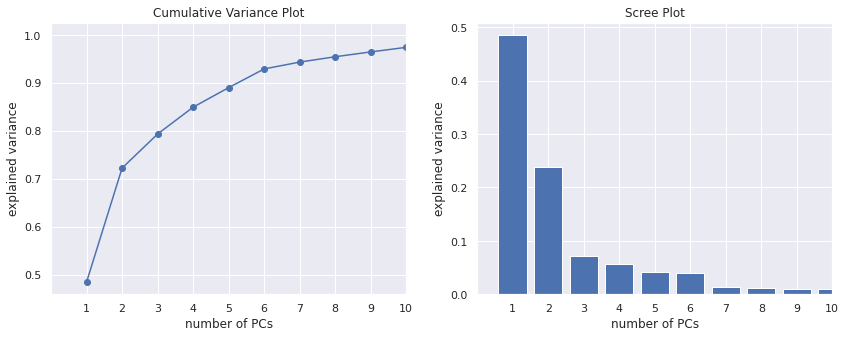

In [54]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax_left, ax_right = ax[0], ax[1]
ax_left.plot(range(1,len(variance)+1), variance.cumsum(), marker='o')
ax_left.set(title='Cumulative Variance Plot', xlabel='number of PCs', ylabel='explained variance', xlim=(0,10), xticks=range(1,len(variance)+1))
ax_right.bar(range(1,len(variance)+1), variance[0:len(variance)])
ax_right.set(title='Scree Plot', xlabel='number of PCs', ylabel='explained variance', xlim=(0,10), xticks=range(1,len(variance)+1))
plt.show()

Based on the cumulative variance plot and scree plot, I decided to keep 6 PCs which account for more than 90% of the total variance.

In [55]:
X = pd.DataFrame(PCA(n_components=6).fit_transform(df_scale), columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])

In [56]:
X

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
0,-0.061964,-0.373179,-0.217208,0.078102,-0.063207,-0.032652
1,13.458387,69.542869,11.027085,-7.032713,0.295415,-1.357154
2,0.003248,0.317474,-0.127636,0.258219,0.049597,-0.108501
3,0.356813,-0.272843,-0.171780,0.083898,0.210065,0.039127
4,62.618737,-10.087979,3.456769,-9.518499,37.149781,12.789469
...,...,...,...,...,...,...
1070989,-0.140032,-0.338536,-0.079214,0.082739,-0.054801,-0.055986
1070990,-0.155037,-0.407944,-0.101342,0.073184,-0.036450,-0.080063
1070991,-0.125226,-0.409313,-0.098865,0.085700,-0.027238,-0.074841
1070992,-0.078408,-0.334908,-0.071593,0.020129,-0.018903,-0.085657


## Algorithms

### Z-score Distance

I do the Z-scaling again to center the PCs and treat them equally important. Now, each record has the value for each variable which explicitly shows how unusual the record is in each dimension. I call this Z-scores and combine them to a single outlierness score for each record, using the following Euclidean distance formula:
$$\begin{aligned} 
& score_{i} = \sqrt{\sum_{k}{\text{Zscore}_{ik}}} && \text{where $i$ refers to each record and $k \in [1,6]$}
\end{aligned}$$

In [57]:
X_scale = pd.DataFrame(StandardScaler().fit_transform(X), columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6'])

In [58]:
X_scale['score_distance'] = np.zeros(len(X_scale))
for i in X_scale.columns[:-1]:
    X_scale['score_distance'] += X_scale.loc[:,i]**2
X_scale['score_distance'] = X_scale['score_distance']**(1/2)

In [59]:
X_scale

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,score_distance
0,-0.013270,-0.114136,-0.121495,0.049222,-0.046632,-0.024643,0.182123
1,2.882271,21.269472,6.167991,-4.432177,0.217946,-1.024290,22.792167
2,0.000696,0.097098,-0.071393,0.162735,0.036591,-0.081890,0.221479
3,0.076416,-0.083448,-0.096085,0.052875,0.154978,0.029530,0.222983
4,13.410536,-3.085377,1.933541,-5.998776,27.407774,9.652641,32.763477
...,...,...,...,...,...,...,...
1070989,-0.029990,-0.103540,-0.044308,0.052144,-0.040430,-0.042255,0.140436
1070990,-0.033203,-0.124769,-0.056686,0.046122,-0.026891,-0.060426,0.162434
1070991,-0.026819,-0.125187,-0.055300,0.054010,-0.020095,-0.056485,0.161123
1070992,-0.016792,-0.102430,-0.040045,0.012686,-0.013946,-0.064648,0.130048


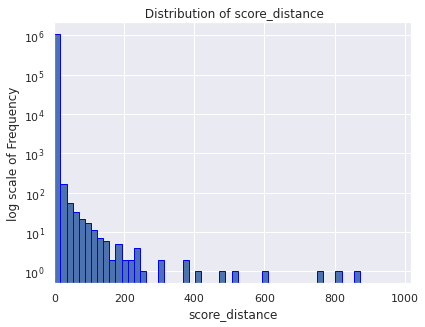

In [60]:
plot_hist(X_scale, 'score_distance', log_scale=1)

### Autoencoder

An autoencoder is a type of neural network for unsupervised learning to learn a representation of a dataset, which can be used for anomaly detection. The model learns to reconstruct the output vector close to the original input vector using the neural network. If the records are not reproduced well, this is a sign of unusual record so we can use the distance between the original input vector and output vector as an anomaly score. Here I create a simple neural network with one hidden layer of 5 nodes using the Keras package.

In [61]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import ModelCheckpoint, History
import tensorflow as tf

In [62]:
encoding_dim = 5
input_dim = Input(shape=(6,))
encoded = Dense(encoding_dim, activation='relu')(input_dim)
decoded = Dense(6)(encoded)
autoencoder = Model(input_dim, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X_scale.iloc[:,:-1], X_scale.iloc[:,:-1], epochs=100, batch_size=1000, shuffle = True, verbose=0, validation_split=0.2,
                          callbacks= [ModelCheckpoint(filepath="/content/drive/My Drive/Colab Notebooks/weights.hdf5", save_best_only= True), History()])
autoencoder_final = tf.keras.models.load_model(filepath="/content/drive/My Drive/Colab Notebooks/weights.hdf5")

In [63]:
autoencoder_final.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 6)]               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 36        
Total params: 71
Trainable params: 71
Non-trainable params: 0
_________________________________________________________________


In [64]:
result = pd.DataFrame(autoencoder_final.predict(X_scale.iloc[:,:-1]))

In [65]:
result

,0,1,2,3,4,5
0,-0.017688,-0.118528,-0.118330,0.040809,-0.036905,-0.039866
1,3.692611,21.006784,5.840676,-3.352150,-0.516522,-0.377513
2,0.009924,0.086492,-0.070001,0.178105,0.030622,-0.078230
3,0.079913,-0.084914,-0.097379,0.061085,0.148464,0.040411
4,14.306090,-2.243440,1.106117,-3.940318,24.936390,13.913218
...,...,...,...,...,...,...
1070989,-0.031303,-0.102770,-0.043242,0.053115,-0.043271,-0.035020
1070990,-0.030965,-0.121844,-0.058746,0.055199,-0.040180,-0.035170
1070991,-0.025144,-0.122525,-0.056584,0.062075,-0.031757,-0.034030
1070992,-0.011132,-0.096815,-0.045083,0.028814,-0.036227,-0.024571


Then, I calculate the distance between the original input vector and output vector and combine them to a single outlierness score for each record using the Euclidean distance formula.

In [66]:
X_scale['score_auto'] = np.zeros(len(X_scale))
for i in range(6):
    X_scale['score_auto'] += (X_scale.loc[:,'PCA'+str(i+1)] - result.loc[:,i])**2
X_scale['score_auto'] = X_scale['score_auto']**(1/2)

In [67]:
X_scale

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,score_distance,score_auto
0,-0.013270,-0.114136,-0.121495,0.049222,-0.046632,-0.024643,0.182123,0.021117
1,2.882271,21.269472,6.167991,-4.432177,0.217946,-1.024290,22.792167,1.719596
2,0.000696,0.097098,-0.071393,0.162735,0.036591,-0.081890,0.221479,0.022019
3,0.076416,-0.083448,-0.096085,0.052875,0.154978,0.029530,0.222983,0.015630
4,13.410536,-3.085377,1.933541,-5.998776,27.407774,9.652641,32.763477,5.540128
...,...,...,...,...,...,...,...,...
1070989,-0.029990,-0.103540,-0.044308,0.052144,-0.040430,-0.042255,0.140436,0.008051
1070990,-0.033203,-0.124769,-0.056686,0.046122,-0.026891,-0.060426,0.162434,0.030244
1070991,-0.026819,-0.125187,-0.055300,0.054010,-0.020095,-0.056485,0.161123,0.026774
1070992,-0.016792,-0.102430,-0.040045,0.012686,-0.013946,-0.064648,0.130048,0.049514


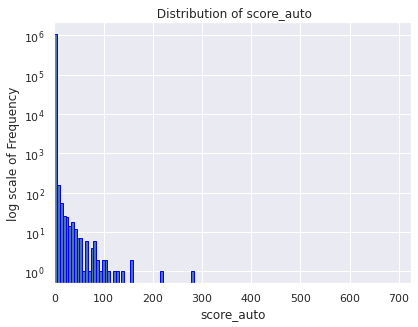

In [68]:
plot_hist(X_scale, 'score_auto', log_scale=1)

### Combining the two scores using Rank

To combine the two scores, I first calculate the rank order of each score. Then, the two scores on the same scale and they can be combined into a single score using the average.

In [69]:
X_scale["score_distance_rank"] = X_scale['score_distance'].rank()
X_scale["score_auto_rank"] = X_scale['score_auto'].rank()
X_scale['score_final'] = (X_scale["score_distance_rank"] + X_scale["score_auto_rank"]) / 2

In [70]:
X_scale.sort_values('score_final', ascending=False).head(10)

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,score_distance,score_auto,score_distance_rank,score_auto_rank,score_final
917941,254.163397,6.947265,-232.653488,205.850877,-324.496136,552.671451,756.236075,725.735917,1070991.0,1070994.0,1070992.5
920627,96.588727,-24.213407,-61.348459,-230.764379,203.449013,-164.118900,367.774411,283.696081,1070985.0,1070993.0,1070989.0
1067000,101.448475,-22.635986,-85.190337,-208.082847,86.515852,-164.963688,309.932342,219.174746,1070984.0,1070992.0,1070988.0
585117,193.972929,-16.045057,-375.495797,-253.502635,-342.875334,-46.614222,602.395220,107.034913,1070990.0,1070985.0,1070987.5
1067359,64.725786,596.797493,388.717590,-332.092578,-141.129787,172.402201,819.380044,84.184632,1070992.0,1070978.0,1070985.0
632815,762.608063,-225.658158,486.454406,249.743693,-199.574037,-261.737722,1019.724912,82.979683,1070994.0,1070976.0,1070985.0
85885,246.475601,-66.283793,41.652811,-95.742208,403.954920,131.632095,506.509502,89.259911,1070989.0,1070979.0,1070984.0
794104,63.262569,-14.405220,-53.947186,-146.528162,88.342373,-103.408119,216.997876,158.570751,1070977.0,1070991.0,1070984.0
690832,95.542841,-12.536987,-89.260588,-32.555258,66.262792,183.264308,237.254024,128.265337,1070979.0,1070988.0,1070983.5
562741,60.887626,-17.601401,-0.249329,-101.958957,157.764785,-72.632282,211.134979,157.860797,1070976.0,1070990.0,1070983.0


## Conclusion

In the conclusion, I select the top 20 anomaly records and investigate them using the original table.

In [71]:
cols = ['RECORD', 'FULLVAL', 'AVLAND', 'AVTOT', 'STADDR', 'LTFRONT', 'LTDEPTH', 'BLDFRONT', 'BLDDEPTH', 'ZIP', 'B', 'TAXCLASS', 'STORIES']
X_scale['RECORD'] = data['RECORD']
top20 = X_scale.sort_values('score_final', ascending=False).head(20)[['RECORD','score_final']]
top20_data = data[data.RECORD.isin(top20['RECORD'])][cols]
top20_data['score_final'] = top20.score_final
top20_data.sort_values('score_final', ascending=False, inplace=True)

In [72]:
top20_data

,RECORD,FULLVAL,AVLAND,AVTOT,STADDR,LTFRONT,LTDEPTH,BLDFRONT,BLDDEPTH,ZIP,B,TAXCLASS,STORIES,score_final
917941,917942,3.740199e+08,1.792809e+09,4.668309e+09,154-68 BROOKVILLE BOULEVARD,4910.0,100.0,40.0,60.0,11422.0,4,4,3.0,1070992.5
920627,920628,1.900000e+06,9.763000e+03,7.576300e+04,7-06 ELVIRA AVENUE,91.0,100.0,1.0,1.0,11691.0,4,1,2.0,1070989.0
1067000,1067001,2.120000e+06,6.540100e+04,1.249100e+05,238 BEDELL AVENUE,96.0,279.0,1.0,1.0,10307.0,5,1,3.0,1070988.0
585117,585118,3.443400e+06,1.549530e+06,1.549530e+06,28-10 QUEENS PLAZA SOUTH,298.0,402.0,1.0,1.0,11101.0,4,4,20.0,1070987.5
1067359,1067360,8.360000e+05,2.880000e+04,5.016000e+04,20 EMILY COURT,1.0,1.0,36.0,45.0,10307.0,5,1,2.0,1070985.0
632815,632816,2.930000e+06,1.318500e+06,1.318500e+06,86-55 BROADWAY,157.0,95.0,1.0,1.0,11373.0,4,2,1.0,1070985.0
85885,85886,7.021400e+07,3.145500e+07,3.159630e+07,JOE DIMAGGIO HIGHWAY,4000.0,150.0,8.0,8.0,10025.0,1,4,1.0,1070984.0
794104,794105,1.356000e+06,1.540800e+04,7.924800e+04,91-25 75 STREET,37.0,100.0,1.0,1.0,11421.0,4,1,3.0,1070984.0
690832,690833,2.420000e+08,1.035000e+08,1.089000e+08,83-98 FOREST PARKWAY,610.0,534.0,20.0,20.0,11385.0,4,4,3.0,1070983.5
562741,562742,6.976000e+05,2.143700e+04,2.143700e+04,1582 EAST 56 STREET,100.0,84.0,1.0,1.0,11234.0,3,1,1.0,1070983.0


Based on the observation, I was able to find two cases of anomalies:
- Incorrect data inputs: most of the abnormal records have high scores because of the value 1 in BLDFRONT, BLDDEPTH, LTFRONT or LTDEPTH. After searching the addresses online, I concluded that most of them must be false entries.
- Mortgage fraud: some of the abnormal records have extremely high values in FULLVAL, AVLAND, AND AVTOT. This might be a sign of false reporting of land/property values to secure higher loans. 

Another type of fraud might be tax avoidance fraud, an attempt to avoid tax by underrating the property or land value, but I did not find this type of anomaly in the top 20 list.

In [73]:
print('duration: ', datetime.now() - start_time)

duration:  0:34:41.405277
